In [1]:
import pandas as pd

df = pd.read_csv('.\PRAC_DATA.csv')

#show the first 5 observations
df.head(5)

#show the last 5 obs

df.tail(5)

,PCE,WAG_S
20,10202.2,6377.5
21,10689.3,6633.2
22,11050.6,6930.3
23,11392.3,7114.4
24,11865.9,7477.8


In [2]:
df2 = pd.read_csv('.\PRAC_DATA2.csv')
df2.isnull()

# option when dealing with missing data: (delete all of them)

df2.dropna()

df2.fillna(df2.mean())

,PCE,WAG_S
0,3825.600,2741.200000
1,3960.200,2814.500000
2,4215.700,2965.500000
3,4471.000,3079.300000
4,4741.000,3236.600000
5,4984.200,3418.000000
6,5268.100,3616.500000
7,5560.700,3876.800000
8,5903.000,4181.600000
9,6307.000,4458.000000


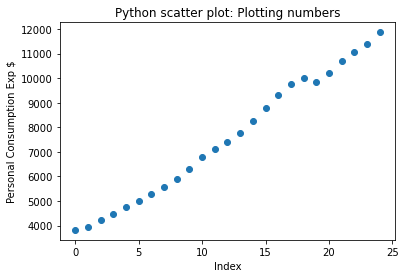

In [3]:
""" SCATTER PLOT """
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Location = ".\PRAC_DATA.csv"
df = pd.read_csv(Location)

plt.scatter(df.index, df['PCE'])
plt.xlabel('Index')
plt.ylabel('Personal Consumption Exp $')
plt.title('Python scatter plot: Plotting numbers')
plt.show()

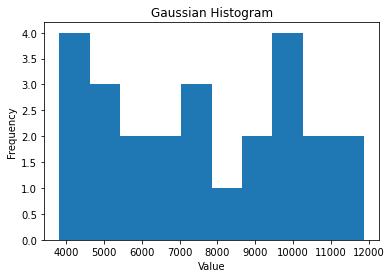

In [4]:
""" HISTOGRAM """
a=df['PCE'].values.tolist()
b=df['WAG_S'].values.tolist()

#histogram basic options.

plt.hist(a)
plt.title("Gaussian Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

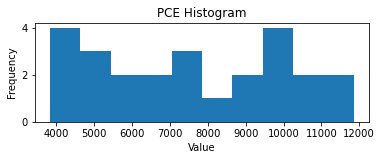

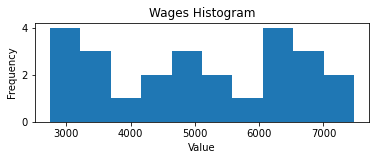

In [5]:
""" multiple graphs in one output using subplot() function """
plt.subplot(2, 1, 1)
plt.hist(a)
plt.title("PCE Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

plt.subplot(2, 1, 2)
plt.hist(b)
plt.title("Wages Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [6]:
""" DESCRIPTIVE STATS """
df.describe()

import scipy.stats as stats

print("Skew of a: %f" % stats.skew(a))
print("Skew of b: %f" % stats.skew(b))

print("Kurtosis of a: %f" % stats.kurtosis(a, fisher=False))
print("Kurtosis of b: %f" % stats.kurtosis(b, fisher=False))

Skew of a: 0.078273
Skew of b: -0.052913
Kurtosis of a: 1.649952
Kurtosis of b: 1.685875


In [7]:
print("Kurtosis of PCE: %f" % stats.kurtosis(df['PCE']))
print("Skew of PCE: %f" % stats.skew(df['PCE']))

Kurtosis of PCE: -1.350048
Skew of PCE: 0.078273


In [8]:
""" adapted from https://www.dev2qa.com/how-to-run-python-script-py-file-in-jupyter-notebook-ipynb-file-and-ipython/ """
# %%writefile JacqueBera.py
# use ipython magic command %%writefile to create a python script file and write below script content to it.
import numpy as np
from scipy import stats

def jarque_bera(resids, axis=0):
    r"""
    Calculates the Jarque-Bera test for normality

    Parameters
    -----------
    data : array-like
        Data to test for normality
    axis : int, optional
        Axis to use if data has more than 1 dimension. Default is 0

    Returns
    -------
    JB : float or array
        The Jarque-Bera test statistic
    JBpv : float or array
        The pvalue of the test statistic
    skew : float or array
        Estimated skewness of the data
    kurtosis : float or array
        Estimated kurtosis of the data

    Notes
    -----
    Each output returned has 1 dimension fewer than data


    The Jarque-Bera test statistic tests the null that the data is normally
    distributed against an alternative that the data follow some other
    distribution. The test statistic is based on two moments of the data,
    the skewness, and the kurtosis, and has an asymptotic :math:`\chi^2_2`
    distribution.

    The test statistic is defined

    .. math:: JB = n(S^2/6+(K-3)^2/24)

    where n is the number of data points, S is the sample skewness, and K is
    the sample kurtosis of the data.
    """
    resids = np.asarray(resids)
    # Calculate residual skewness and kurtosis
    skew = stats.skew(resids, axis=axis)
    kurtosis = 3 + stats.kurtosis(resids, axis=axis)

    # Calculate the Jarque-Bera test for normality
    n = resids.shape[axis]
    jb = (n / 6.) * (skew ** 2 + (1 / 4.) * (kurtosis - 3) ** 2)
    jb_pv = stats.chi2.sf(jb, 2)

    return jb, jb_pv, skew, kurtosis

In [9]:
%run -i JacqueBera.py # comment out if unable to run the above %%writefile command
jarque_bera(a)

(1.9240989082136077,
 0.3821089681536719,
 0.07827263178294185,
 1.6499523962688756)

<Figure size 432x288 with 0 Axes>

In [10]:
""" DATA TRANSFORMATION """
import numpy as np

df_log_a = np.log(df["PCE"])
print(df_log_a.head(5))

0    8.249471
1    8.284050
2    8.346571
3    8.405367
4    8.464003
Name: PCE, dtype: float64


In [11]:
""" LINEAR SINGLE REGRESSION """
import numpy as np
import pandas as pd

#for the OLS function
from statsmodels.formula.api import ols

#for the BP test
import statsmodels.stats.api as sms

import matplotlib.pyplot as plt
import statsmodels.api as stats

#additional functionality
from statsmodels.compat import lzip

# df = pd.read_csv('./PRAC_DATA.csv')

model1 = ols("PCE ~ WAG_S", data=df).fit()

print (model1.summary())

                            OLS Regression Results                            
Dep. Variable:                    PCE   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     3317.
Date:                Wed, 08 Dec 2021   Prob (F-statistic):           2.26e-26
Time:                        16:55:53   Log-Likelihood:                -169.14
No. Observations:                  25   AIC:                             342.3
Df Residuals:                      23   BIC:                             344.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1006.2594    155.342     -6.478      0.0

In [12]:
""" print out only statistical measures """
print('Parameters: ', model1.params)
print('R2: ', model1.rsquared)
print('Residuals: ', model1.resid)

print('Standard errors: ', model1.bse)
print('Predicted values: ', model1.predict())

Parameters:  Intercept   -1006.259401
WAG_S           1.714317
dtype: float64
R2:  0.9931138094784611
Residuals:  0     132.574643
1     141.515234
2     138.153422
3     198.364189
4     198.702182
5     130.925145
6      74.533293
7     -79.103327
8    -259.327037
9    -329.164155
10   -474.461245
11   -384.050932
12   -175.052231
13    -36.056603
14    -28.593959
15     42.469118
16    -74.042180
17   -206.638339
18   -177.885423
19    136.380393
20    275.405066
21    324.154302
22    176.130830
23    202.225138
24     52.842473
dtype: float64
Standard errors:  Intercept    155.341975
WAG_S          0.029766
dtype: float64
Predicted values:  [ 3693.02535704  3818.68476633  4077.54657811  4272.63581109
  4542.29781767  4853.27485513  5193.56670703  5639.80332694
  6162.32703707  6636.16415479  7266.86124454  7487.15093205
  7559.15223069  7801.55660278  8288.59395858  8751.6308815
  9378.04217967  9957.13833874 10191.48542264  9710.61960672
  9926.79493431 10365.1456977  10874.46916

In [13]:
""" examine MODEL ASSUMPTIONS """
# correlation
print("correlation:", df.corr())
# Breusch-Pagan Test (heteroskedasticity)
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(model1.resid, model1.model.exog)
lzip(name, test)

correlation:             PCE     WAG_S
PCE    1.000000  0.996551
WAG_S  0.996551  1.000000


[('Lagrange multiplier statistic', 0.056030952645055865),
 ('p-value', 0.8128828769221963),
 ('f-value', 0.051664268360409375),
 ('f p-value', 0.8222005061406059)]

In [14]:
""" MULTIPLE REGRESSION """
df=pd.read_excel('.\SouthStyleData2.xlsx')
df.columns = ["ter", "sales","market","stores","dealers","brands","population"]

model2 = ols("dealers ~ population + stores", data=df).fit()
print (model2.summary())

                            OLS Regression Results                            
Dep. Variable:                dealers   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     125.1
Date:                Wed, 08 Dec 2021   Prob (F-statistic):           2.22e-14
Time:                        16:55:53   Log-Likelihood:                -85.937
No. Observations:                  30   AIC:                             177.9
Df Residuals:                      27   BIC:                             182.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -13.6665      2.582     -5.293      0.0

In [15]:
""" check multi-collinearity"""
df.corr() # e.g. "sales" and "market" are highly correlated

,ter,sales,market,stores,dealers,brands,population
ter,1.000000,0.042705,-0.068923,0.049701,0.012885,0.077219,0.084445
sales,0.042705,1.000000,0.943238,0.913674,0.975638,-0.919762,0.974565
market,-0.068923,0.943238,1.000000,0.856976,0.926025,-0.874692,0.910641
stores,0.049701,0.913674,0.856976,1.000000,0.905276,-0.761793,0.931535
dealers,0.012885,0.975638,0.926025,0.905276,1.000000,-0.878535,0.948104
brands,0.077219,-0.919762,-0.874692,-0.761793,-0.878535,1.000000,-0.889729
population,0.084445,0.974565,0.910641,0.931535,0.948104,-0.889729,1.000000


In [16]:
""" Breusch-Pagan Test """
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']

test = sms.het_breuschpagan(model2.resid, model2.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 0.9456771185437773),
 ('p-value', 0.6232306778708472),
 ('f-value', 0.43940590708067157),
 ('f p-value', 0.6489456142051184)]